In [13]:
import pandas as pd
import os
import matplotlib.pyplot as plt
# %matplotlib widget

In [23]:
otmol_data_path = "./otmolOutput"
otmol_wc0_emd_results = pd.read_csv(os.path.join(otmol_data_path, 'wc_memory_usage_ArbAlignDataWC_emd.csv'))
otmol_wc0_sOT_results = pd.read_csv(os.path.join(otmol_data_path, 'wc_memory_usage_ArbAlignDataWC_sOT.csv'))
otmol_wc1_emd_results = pd.read_csv(os.path.join(otmol_data_path, 'wc_memory_usage_1st2nd_emd.csv'))
otmol_wc1_sOT_results = pd.read_csv(os.path.join(otmol_data_path, 'wc_memory_usage_1st2nd_sOT.csv'))
otmol_wc2_emd_results = pd.read_csv(os.path.join(otmol_data_path, 'wc_memory_usage_Largest_RMSD_emd.csv'))
otmol_wc2_sOT_results = pd.read_csv(os.path.join(otmol_data_path, 'wc_memory_usage_Largest_RMSD_sOT.csv'))
otmol_ng_emd_results = pd.read_csv(os.path.join(otmol_data_path, 'ng_memory_usage_emd.csv'))
otmol_ng_sinkhorn_results = pd.read_csv(os.path.join(otmol_data_path, 'ng_memory_usage_sinkhorn.csv'))
arbalign_data_path = "./ArbAlignOutput"
arbalign_wc0_results = pd.read_csv(os.path.join(arbalign_data_path, 'ArbAlignDataWC_memory_usage.csv'))
arbalign_wc1_results = pd.read_csv(os.path.join(arbalign_data_path, '1st2ndWC_memory_usage.csv'))
arbalign_wc2_results = pd.read_csv(os.path.join(arbalign_data_path, 'largest_RMSD_WC_memory_usage.csv'))
arbalign_ng_results = pd.read_csv(os.path.join(arbalign_data_path, 'NeonCluster_memory_usage.csv'))

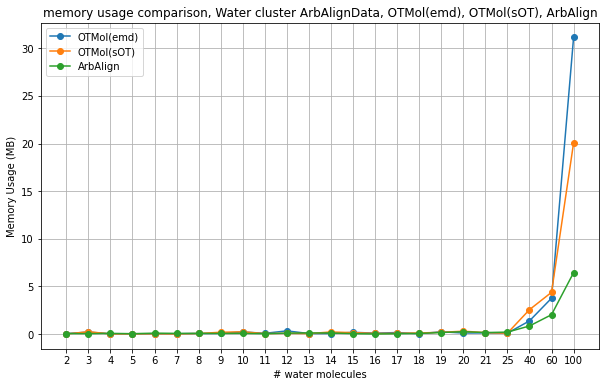

In [28]:
info = pd.read_csv(os.path.join("../Data/Water-Clusters", 'rmsd-2017.dat'), sep='\s+')
df = pd.concat([info, otmol_wc0_emd_results.rename(columns={'memory_used': 'OTMol(emd)'}), otmol_wc0_sOT_results.rename(columns={'memory_used': 'OTMol(sOT)'}), arbalign_wc0_results.rename(columns={'Memory_Usage_MB': 'ArbAlign'})], axis=1)

columns_to_plot = ["OTMol(emd)", "OTMol(sOT)", "ArbAlign"]
plt.figure(figsize=(10,6))
for column in columns_to_plot:
    plt.plot(range(len(df['#'])), df[column], marker='o', label=column)
plt.xticks(range(len(df['#'])), df['#'])
plt.title("memory usage comparison, Water cluster ArbAlignData, OTMol(emd), OTMol(sOT), ArbAlign")
plt.xlabel("# water molecules")
plt.ylabel("Memory Usage (MB)")
plt.legend()
plt.grid(True)

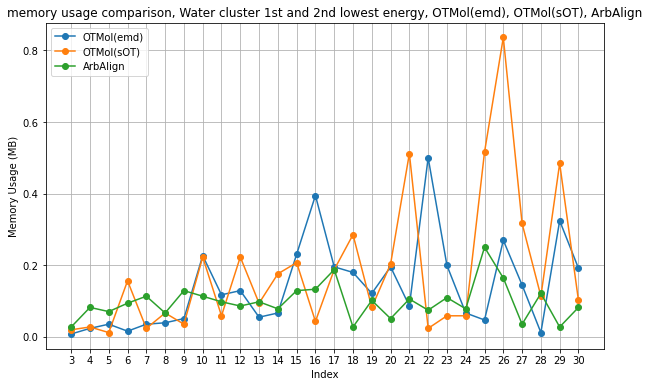

In [ ]:
group1_info = pd.read_csv('../Data/Our_Benchmark_20250410_ver1/Water_Cluster_3_30/water_cluster_1st_2nd_lowest_energy.csv')
df = pd.concat([group1_info, otmol_wc1_emd_results.rename(columns={'memory_used': 'OTMol(emd)'}), otmol_wc1_sOT_results.rename(columns={'memory_used': 'OTMol(sOT)'}), arbalign_wc1_results.rename(columns={'Memory_Usage_MB': 'ArbAlign'})], axis=1)

columns_to_plot = ["OTMol(emd)", "OTMol(sOT)", "ArbAlign"]
plt.figure(figsize=(10,6))
for column in columns_to_plot:
    plt.plot(range(len(df['Wat_num'])), df[column], marker='o', label=column)
plt.xticks(range(len(df['Wat_num'])), df['Wat_num'])
plt.title("memory usage comparison, Water cluster 1st and 2nd lowest energy, OTMol(emd), OTMol(sOT), ArbAlign")
plt.xlabel("# water molecules")
plt.ylabel("Memory Usage (MB)")
plt.legend()
plt.grid(True)

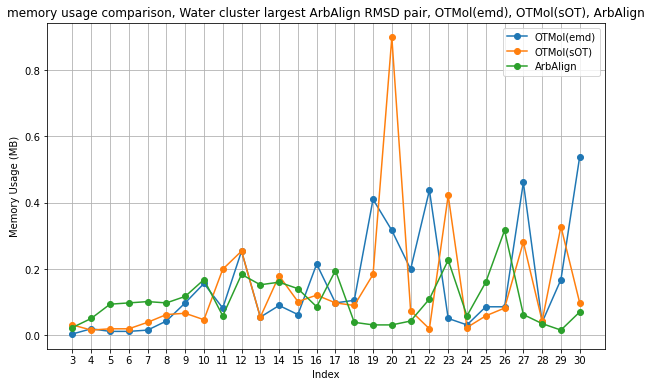

In [22]:
group2_info = pd.read_csv('../Data/Our_Benchmark_20250410_ver1/Water_Cluster_3_30/water_cluster_largest_RMSD_pair_among_20_lowest_energy.csv')
df = pd.concat([group2_info, otmol_wc2_emd_results.rename(columns={'memory_used': 'OTMol(emd)'}), otmol_wc2_sOT_results.rename(columns={'memory_used': 'OTMol(sOT)'}), arbalign_wc2_results.rename(columns={'Memory_Usage_MB': 'ArbAlign'})], axis=1)

columns_to_plot = ["OTMol(emd)", "OTMol(sOT)", "ArbAlign"]
plt.figure(figsize=(10,6))
for column in columns_to_plot:
    plt.plot(range(len(df['Wat_num'])), df[column], marker='o', label=column)
plt.xticks(range(len(df['Wat_num'])), df['Wat_num'])
plt.title("memory usage comparison, Water cluster largest ArbAlign RMSD pair, OTMol(emd), OTMol(sOT), ArbAlign")
plt.xlabel("# water molecules")
plt.ylabel("Memory Usage (MB)")
plt.legend()
plt.grid(True)

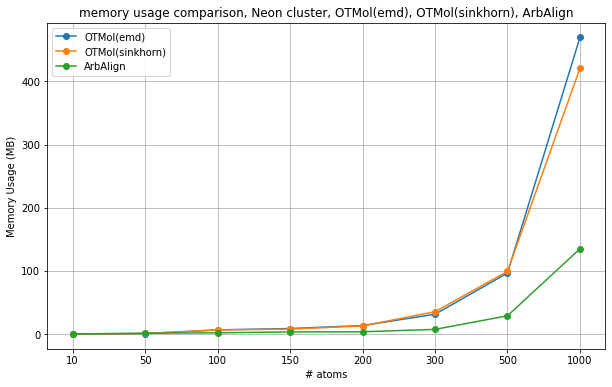

In [29]:
info = pd.read_csv(os.path.join("../Data/Neon-Clusters/", 'rmsd-2017.dat'), sep='\s+')
df = pd.concat([info, otmol_ng_emd_results.rename(columns={'memory_used': 'OTMol(emd)'}), otmol_ng_sinkhorn_results.rename(columns={'memory_used': 'OTMol(sinkhorn)'}), arbalign_ng_results.rename(columns={'Memory_Usage_MB': 'ArbAlign'})], axis=1)

columns_to_plot = ["OTMol(emd)", "OTMol(sinkhorn)", "ArbAlign"]
plt.figure(figsize=(10,6))
for column in columns_to_plot:
    plt.plot(range(len(df)), df[column], marker='o', label=column)
plt.xticks(range(len(df)), df['#'])
plt.title("memory usage comparison, Neon cluster, OTMol(emd), OTMol(sinkhorn), ArbAlign")
plt.xlabel("# atoms")
plt.ylabel("Memory Usage (MB)")
plt.legend()
plt.grid(True)